In [174]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [175]:
df = pd.read_csv("2025-11-29_13-10-08-387.csv")
vds = df.CH1.values*100  # x100 probe
iD =  df.CH2.values # x100 probe
df.head()

,CH1,CH2,CH3,CH4,time,Ts
0,-0.28,-0.48,-0.38,-0.044,0.000000e+00,2.000000e-07
1,-0.28,-0.52,-0.40,-0.048,2.000000e-07,NaN
2,-0.24,-0.52,-0.36,-0.058,4.000000e-07,NaN
3,-0.26,-0.52,-0.38,-0.054,6.000000e-07,NaN
4,-0.28,-0.52,-0.30,-0.044,8.000000e-07,NaN


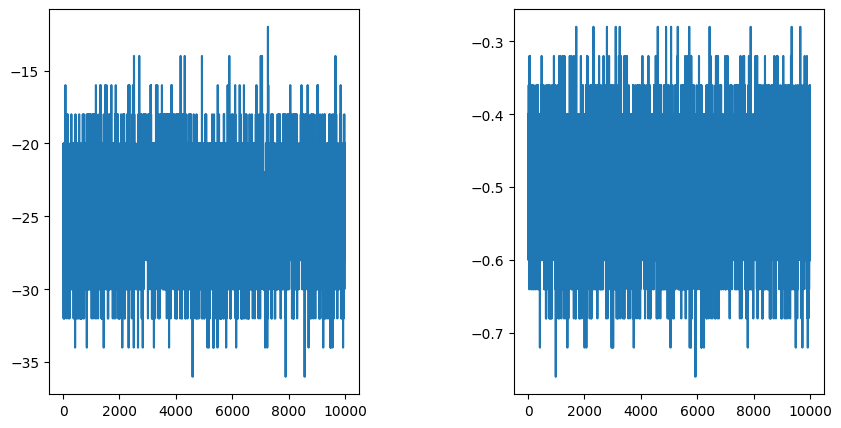

In [176]:

fig, axs = plt.subplots(1,2, figsize=(10,5)
, gridspec_kw={'wspace':0.5#, 'hspace': 1.0
              })
axs[0].plot(vds)
axs[1].plot(iD)


In [177]:
vds_thre= vds.mean()
iD_thre= iD.mean()
vds_thre, iD_thre

(np.float64(-24.7124), np.float64(-0.5041800000000001))

In [178]:
df = pd.read_csv("2025-11-29_15-40-48-127.csv")
df.head()

,CH1,CH2,time,Ts
0,3.460000,-0.500000,0.000000e+00,4.000000e-09
1,3.480000,-0.499219,4.000000e-09,NaN
2,3.420000,-0.503906,8.000000e-09,NaN
3,3.480000,-0.699219,1.200000e-08,NaN
4,3.479844,-0.600000,1.600000e-08,NaN


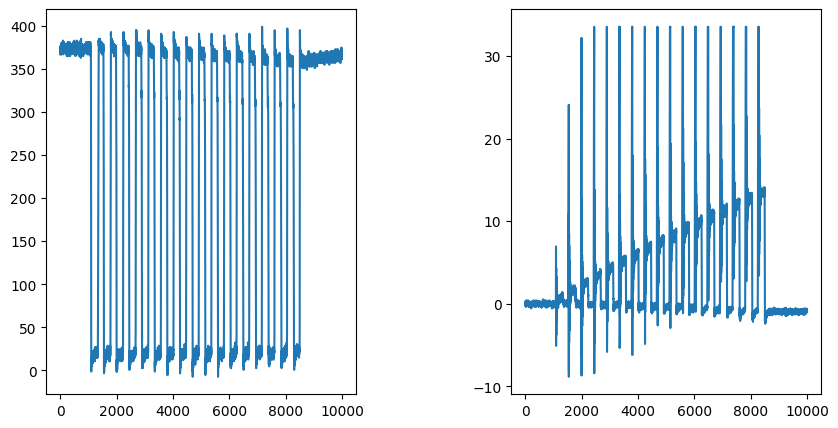

In [179]:
Ts = df.Ts.values[0]
vds = df.CH1.values*100 -vds_thre # x100 probe
iD =  df.CH2.values-iD_thre # x100 probe
iD = iD -iD[:500].mean()
#diD =  df.CH2.values # x100 probe
#diD = diD -diD[:500].mean()

#vgs = df.CH4.values
#vgs = vgs-vgs[:500].mean()


fig, axs = plt.subplots(1,2, figsize=(10,5)
, gridspec_kw={'wspace':0.5#, 'hspace': 1.0
              })
axs[0].plot(vds)
axs[1].plot(iD)

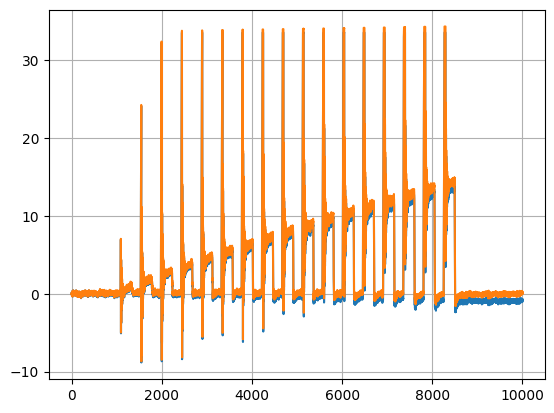

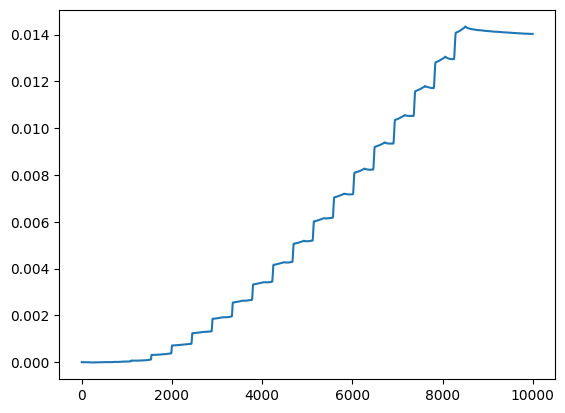

In [180]:
plt.plot(iD)
#k= 7e-5
#iD2= iD + np.arange(0,len(iD))*k
#iD2[:100].mean(), iD2[-100:].mean()
def ID2_find(iD): 
    a = np.arange(len(iD))
    k = (iD[-100:].mean() - iD[:100].mean()) / (a[:100].mean() - a[-100:].mean())
    iD2 = iD + a * k
    return k, iD2 
k, iD2 = ID2_find(iD)

plt.plot(iD2)
plt.grid()
plt.show()
# Primary y-axis
p = vds*iD2
p = p-p[:500].mean()
E =np.cumsum(p)*Ts
#plt.plot(t, p, color='C2')
#plt.show()
plt.plot( E)


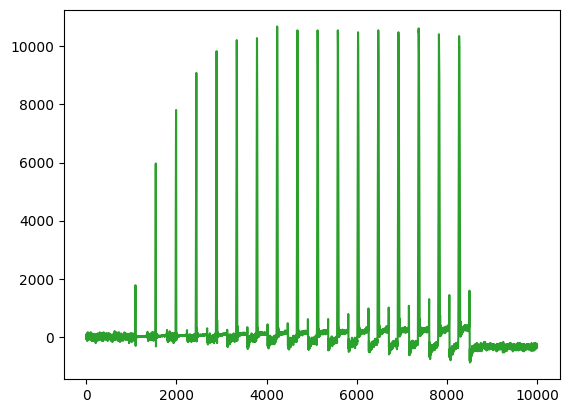

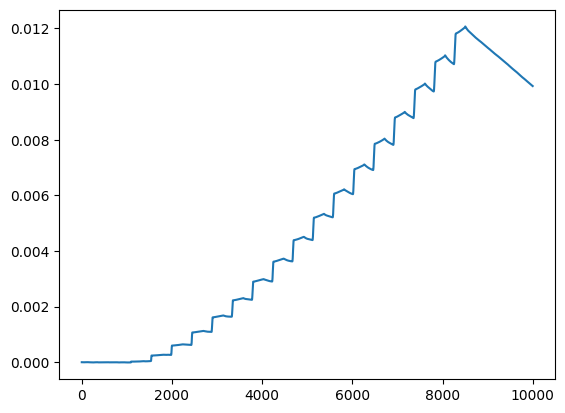

In [181]:
#### Primary y-axis
p = vds*iD
p = p-p[:500].mean()
E =np.cumsum(p)*Ts
plt.plot( p, color='C2')
plt.show()
plt.plot( E)




35


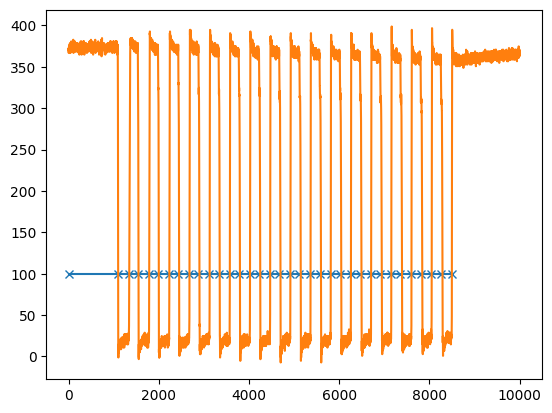

In [182]:
from math import *
arg=[0]
for i in range(10, len(vds)-10):
    if abs(vds[i+3]-vds[i-3])>20:
        if i-arg[-1]>100:
            arg.append(i) 
print(len(arg))
plt.plot(arg, len(arg)*[100], marker="x")
plt.plot(vds)

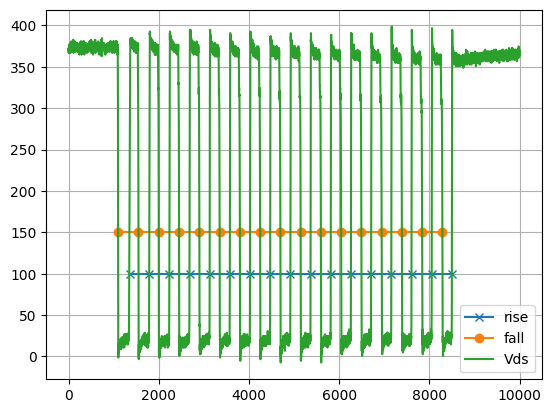

In [183]:
def trigger (sig , thresh= None, transition= "rise", marginI = 20):
    arr=[0]
    if thresh is None: 
        thresh = (sig.max()+sig.min())/2
    for i in range(1, len(sig)):
        if transition =="rise":
            if sig[i-1] <thresh and sig[i] >= thresh and i > arr[-1]+marginI:
                arr.append(i)
        elif sig[i-1] >thresh and sig[i] <= thresh and i > arr[-1]+marginI:
            arr.append(i)
    return arr[1:]
idx_rise = trigger (vds, transition= "rise")
idx_fall= trigger (vds, transition= "fall")
plt.plot(idx_rise, len(idx_rise)*[100], marker="x", label = "rise")
plt.plot(idx_fall, len(idx_fall)*[150], marker="o", label = "fall")
plt.plot(vds, label = "Vds")
plt.legend()
plt.grid()

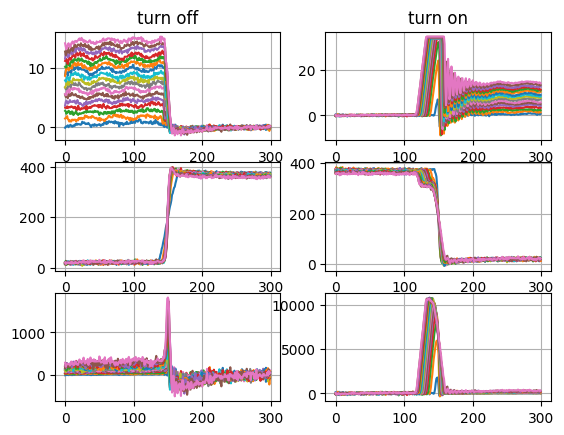

In [184]:
def EONEOFF (plot = True, pltshow = True): 
    idx_rise = trigger (vds, transition= "rise")
    idx_fall= trigger (vds, transition= "fall")
    if plot : 
        fig , axs= plt.subplots(3,2)
    di=150
    Eon={}
    Eoff={}
    deltaV={}
    k, iD2 = ID2_find(iD)
    for i in idx_rise: 
        ### off
        
        
        I1 = iD2[i-di-10:i-di].mean()
        
    
    
        I0 = iD2[i+di-50:i+di].mean()
        V0 = iD2[i-di:i-di+50].mean()
        V0=0
        p=(vds[i-di:i+di]-V0)*(iD2[i-di:i+di]-I0)
        #print(i, di, i-di,i+di)
  
        indx = np.where(p>p.max()/2)[0]
        p2= p[indx[0]-20:indx[-1]+20]
        p2= p
        E= np.sum(p2)*Ts*1e6
    
        Eoff[I1]=E

        if plot :
            axs[2][0].plot(p)
            axs[1][0].plot(vds[i-di:i+di])
            axs[0][0].set_title("turn off")
            axs[0][0].plot(iD2[i-di:i+di]-I0)
        deltaV[I1]= vds[i-di:i+di].max()-vds[i-di:i+di][-20:].mean()
    for i in idx_fall: 
        I1 = iD2[i+10:i+di*2+10].mean()
        I0 = iD2[i-di:i-di+50].mean()
    
        V0 = iD2[i+di-50:i+di].mean()
        V0=0
    
        p=(vds[i-di:i+di]-V0)*(iD2[i-di:i+di]-I0)
        indx = np.where(p>p.max()/2)[0]
        p2= p[indx[0]-20:indx[-1]+20]
        p2 =p
        E= np.sum(p2)*Ts*1e6
        
        if plot :
            axs[2][1].plot(p)
            axs[1][1].plot(vds[i-di:i+di])
            axs[0][1].set_title("turn on")
            axs[0][1].plot(iD2[i-di:i+di]-I0)
        Eon[I1]=E
    if plot : 
        for ax in axs .flatten(): 
            ax.grid()
    if pltshow:
        plt.show()
    else:
        plt.close(fig)   # <-- prevents showing but keeps fig so user can save it
    return Eon , Eoff, deltaV, fig
Eon , Eoff, deltaV , fig= EONEOFF (plot = True, pltshow = True)


In [185]:
Eon , Eoff, deltaV , fig= EONEOFF (plot = True, pltshow = False)
fig.savefig("figs/test.png")

<Axes: >

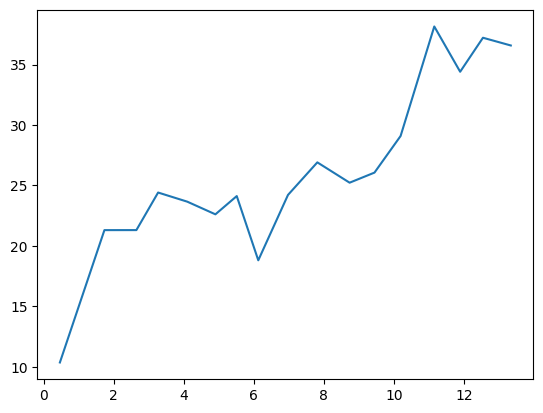

In [186]:
pd.Series(deltaV).plot()

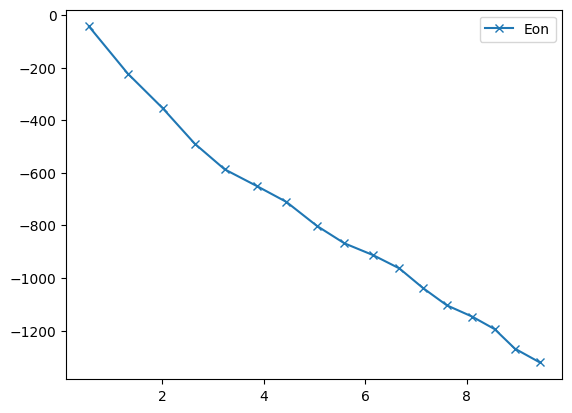

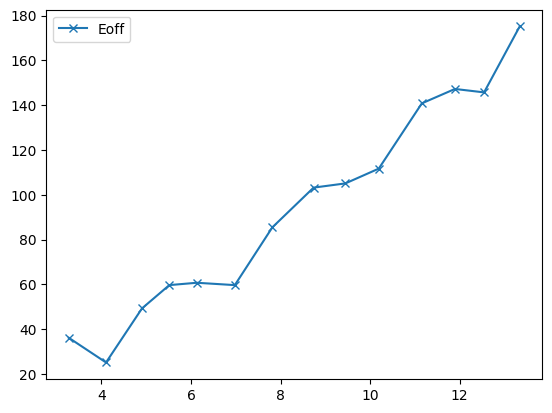

In [187]:
(-pd.Series(Eon)).plot(label = "Eon",marker="x")
plt.legend()
plt.show()
s=pd.Series(Eoff)
s=s[s.index>3]
s.plot(label = "Eoff",marker="x")
plt.legend()

# End

In [188]:
l = """10 ohm 
2025-11-29_15-40-48-127
5 ohm
2025-11-29_15-41-49-332
3 ohm
2025-11-29_15-42-24-226
3 ohm V2
2025-11-29_15-51-14-933
3//5=1.87 ohm 
2025-11-29_16-23-05-938
10//3 =2.3 ohm 
2025-11-29_16-25-13-741""".replace(" ", "").split("\n")
names = l[1::2]
labels=l[0::2]
print(names), print(labels)

['2025-11-29_15-40-48-127', '2025-11-29_15-41-49-332', '2025-11-29_15-42-24-226', '2025-11-29_15-51-14-933', '2025-11-29_16-23-05-938', '2025-11-29_16-25-13-741']
['10ohm', '5ohm', '3ohm', '3ohmV2', '3//5=1.87ohm', '10//3=2.3ohm']


(None, None)

In [189]:
#list={}
dic  = {}
for i in range(len(names)):
    data ={}
    path  = names[i]+".csv"
    label = labels[i]
    print(path, label)
    df = pd.read_csv(path)
    Ts = df.Ts.values[0]
    vds = df.CH1.values*100 -vds_thre # x100 probe
    iD =  df.CH2.values-iD_thre # x100 probe
    iD = iD -iD[:500].mean()
    
    

    Eon , Eoff, deltaV , fig= EONEOFF (plot = True, pltshow = False)
    fig.savefig(f"figs/{label.replace("/", "_")}.png")
      
        
    #plt.show()  
    data["Eon"]=Eon
    #(-pd.Series(Eon)).plot(label = "Eon",marker="x")
    #s.plot(label = "Eoff",marker="x")
    data["Eoff"]= Eoff
    data["deltaV"]= deltaV
    #plt.legend()
    #plt.show()
    dic[label]= data

2025-11-29_15-40-48-127.csv 10ohm
2025-11-29_15-41-49-332.csv 5ohm
2025-11-29_15-42-24-226.csv 3ohm
2025-11-29_15-51-14-933.csv 3ohmV2
2025-11-29_16-23-05-938.csv 3//5=1.87ohm
2025-11-29_16-25-13-741.csv 10//3=2.3ohm


In [190]:
#dic

In [191]:
dic.keys()

dict_keys(['10ohm', '5ohm', '3ohm', '3ohmV2', '3//5=1.87ohm', '10//3=2.3ohm'])

In [192]:
dic['10ohm'].keys()

dict_keys(['Eon', 'Eoff', 'deltaV'])

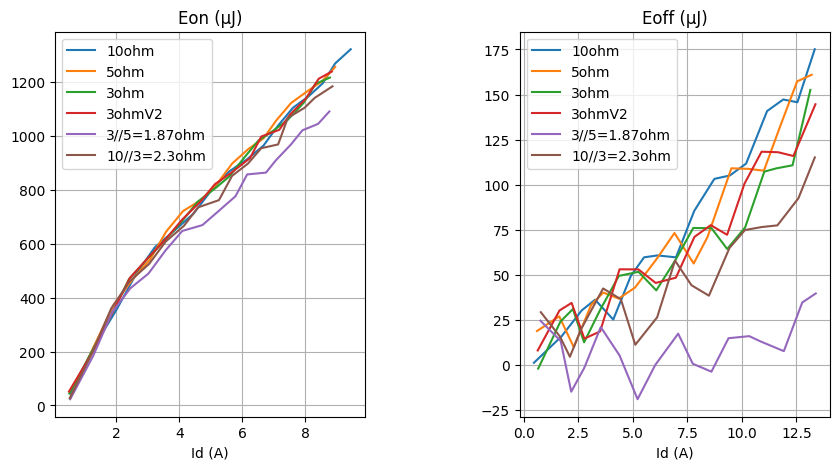

In [193]:
fig, axs = plt.subplots(1,2, figsize=(10,5)
, gridspec_kw={'wspace':0.5#, 'hspace': 1.0
              })
for kk, v in dic.items():
    Eon = v["Eon"]
    #Eon = Eon[Eon.index>1]
    Splot = pd.Series(Eon)

    Splot.plot(ax = axs[0], label = kk)
    Eoff = v["Eoff"]
    #Eon = Eon[Eon.index>1]
    Splot = pd.Series(Eoff)
    
    Splot.plot(ax = axs[1], label = kk)
axs[0].set_title("Eon (µJ)")
axs[1].set_title("Eoff (µJ)")
axs[0].set_xlabel("Id (A)")
axs[1].set_xlabel("Id (A)")
axs[0].grid()
axs[1].grid()
axs[0].legend()
axs[1].legend()

In [223]:
import json

with open("res.json", "w") as f:
    json.dump(dic, f)

In [194]:
P = 100e-6*100e3
print("Power off by mos W @ 11A", P)

Power off by mos W @ 11A 10.0


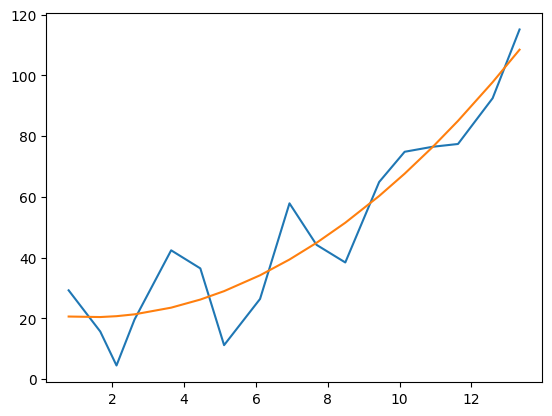

In [195]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

X = np.array(Splot .index).reshape(-1,1)
y = Splot .values
poly = PolynomialFeatures(2)
X2 = poly.fit_transform(X.reshape(-1,1))

model = LinearRegression().fit(X2, y)
yh = model.predict(X2)
plt.plot(X, y)
plt.plot(X, yh)

In [201]:
x>2

NameError: name 'x' is not defined

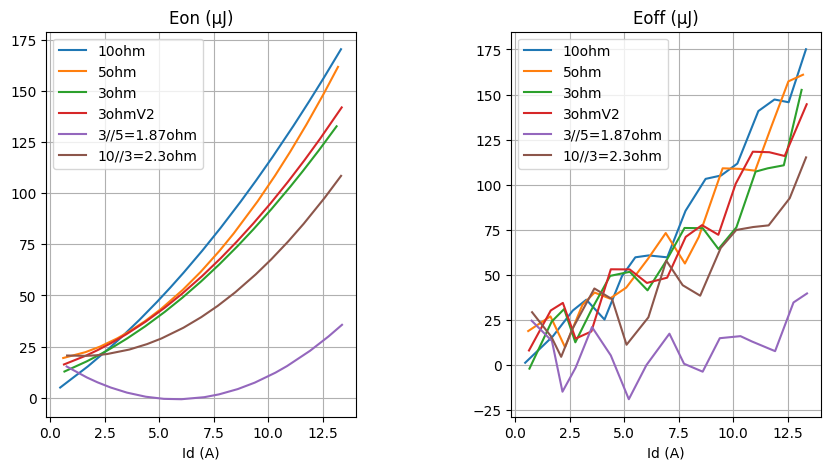

In [200]:
fig, axs = plt.subplots(1,2, figsize=(10,5)
, gridspec_kw={'wspace':0.5#, 'hspace': 1.0
              })
for kk, v in dic.items():

    Eoff = v["Eoff"]
    #Eon = Eon[Eon.index>1]
    Splot = pd.Series(Eoff)
    
    Splot.plot(ax = axs[1], label = kk)


    X = np.array(Splot .index).reshape(-1,1)
    y = Splot .values
    poly = PolynomialFeatures(2)
    X2 = poly.fit_transform(X.reshape(-1,1))
    
    model = LinearRegression().fit(X2, y)
    yh = model.predict(X2)
    axs[0].plot(X, yh, label = kk)


axs[0].set_title("Eon (µJ)")
axs[1].set_title("Eoff (µJ)")
axs[0].set_xlabel("Id (A)")
axs[1].set_xlabel("Id (A)")
axs[0].grid()
axs[1].grid()
axs[0].legend()
axs[1].legend()

In [239]:
dic.keys()

dict_keys(['10ohm', '5ohm', '3ohm', '3ohmV2', '3//5=1.87ohm', '10//3=2.3ohm'])

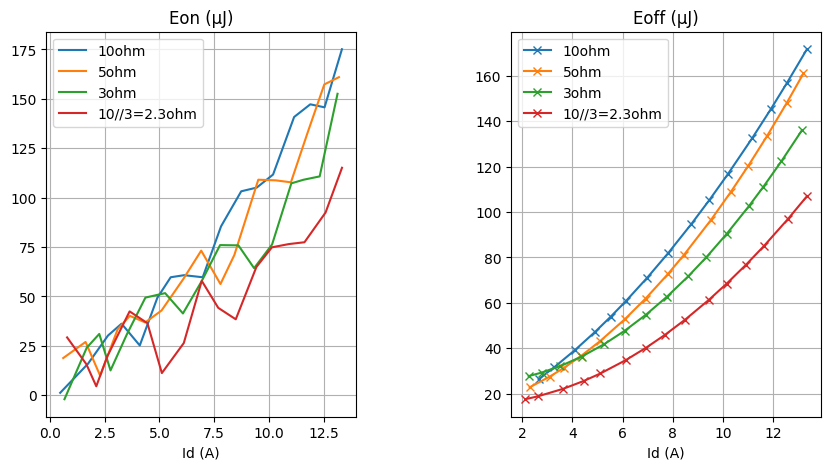

In [247]:
fig, axs = plt.subplots(1,2, figsize=(10,5)
, gridspec_kw={'wspace':0.5#, 'hspace': 1.0
              })
for kk, v in dic.items():
    if kk in ['3//5=1.87ohm','3ohmV2']:
        continue

    Eoff = v["Eoff"]
    #Eon = Eon[Eon.index>1]
    Splot = pd.Series(Eoff)
    
    Splot.plot(ax = axs[0], label = kk)


    X = np.array(Splot .index).reshape(-1,1)
    y = Splot .values
    mask = X>2
    X= X[mask]
    y= y[mask.flatten()]
    poly = PolynomialFeatures(2)
    X2 = poly.fit_transform(X.reshape(-1,1))
    
    model = LinearRegression().fit(X2, y)
    yh = model.predict(X2)
    axs[1].plot(X, yh, label = kk, marker = "x")


axs[0].set_title("Eon (µJ)")
axs[1].set_title("Eoff (µJ)")
axs[0].set_xlabel("Id (A)")
axs[1].set_xlabel("Id (A)")
axs[0].grid()
axs[1].grid()
axs[0].legend()
axs[1].legend()

In [197]:
v.keys()

dict_keys(['Eon', 'Eoff', 'deltaV'])

C:\Users\a037702\AppData\Local\Temp\ipykernel_16880\4199451711.py:21: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[0].legend()


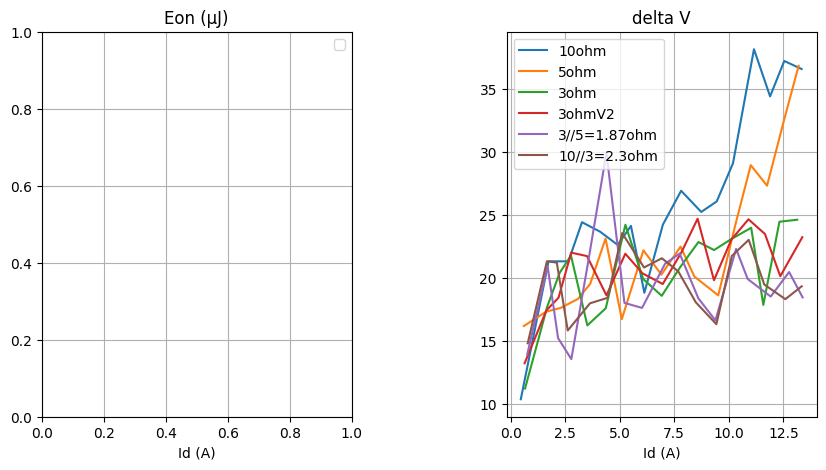

In [198]:
fig, axs = plt.subplots(1,2, figsize=(10,5)
, gridspec_kw={'wspace':0.5#, 'hspace': 1.0
              })
for kk, v in dic.items():

    Eoff = v['deltaV']
    #Eon = Eon[Eon.index>1]
    Splot = pd.Series(Eoff)
    
    Splot.plot(ax = axs[1], label = kk)




axs[0].set_title("Eon (µJ)")
axs[1].set_title("delta V")
axs[0].set_xlabel("Id (A)")
axs[1].set_xlabel("Id (A)")
axs[0].grid()
axs[1].grid()
axs[0].legend()
axs[1].legend()

### ringing Mosfet

In [173]:
# IPW60R037P7
# https://www.infineon.com/assets/row/public/documents/24/49/infineon-ipw60r037p7-ds-en.pdf?fileId=5546d46259d9a4bf015a5bb7bab83ca7


In [78]:
Fr1 = 4.88*10
Fr2 = 4.86*10
Fr = 1e6*(Fr1+Fr2)/2
Fr/1e6

48.7

In [79]:
from math import *
#Coss= 85e-12
Coer=156e-12

#C= Coss
C= Coer
w = Fr*(2*pi) # 1/sqrt(LC)
L= 1/(C*w**2)
print(L*1e9, "nF")

68.46328640527037 nF


In [80]:
# Verification 
1e-6/(2*pi*sqrt(L*C))

48.7